In [1]:
%config IPCompleter.greedy=True
import numpy as np
x = np.random.rand(10,2) # 10 exaples with feature size = 1

In [2]:
x[0]

array([0.46177457, 0.29442732])

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100,1)

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# find the close form solution 
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.72411056],
       [3.10022838]])

In [6]:
# Find parameters using linear regression models 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([3.72411056]), array([[3.10022838]]))

In [8]:
X_new = np.array([[0], [2], [4]])
y_predict = lin_reg.predict(X_new)
y_predict 
X_new_b = np.c_[np.ones((3,1)), X_new]
y_predict_2 = X_new_b.dot(theta_best) 
y_predict_2

array([[ 3.72411056],
       [ 9.92456732],
       [16.12502408]])

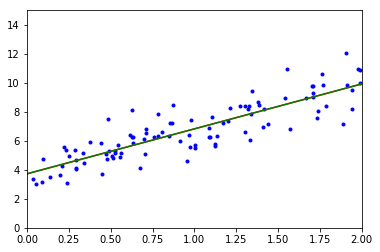

In [9]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.plot(X_new, y_predict, "r-")
plt.plot(X_new, y_predict_2, "g-")
plt.show()

In [10]:
"""
* Tweak parameters iteratively to minimize a cost function
* cost funciton should be a convex function (MSE)
* Random initialization 
* Learning rate 
    - too small - take long time to converge 
    - too high  - jump across the valley and end up on the other side
* cost functions with holes, ridges, plateaus or irregular terrains
    - reach global minimum and local minimum 
    - very long time to cross plateau 
* Features should be in same scale (use StandardScalar)

"""

'\n* Tweak parameters iteratively to minimize a cost function\n* cost funciton should be a convex function (MSE)\n* Random initialization \n* Learning rate \n    - too small - take long time to converge \n    - too high  - jump across the valley and end up on the other side\n* cost functions with holes, ridges, plateaus or irregular terrains\n    - reach global minimum and local minimum \n    - very long time to cross plateau \n* Features should be in same scale (use StandardScalar)\n\n'

SUCCESS
[[3.72411056]
 [3.10022838]]


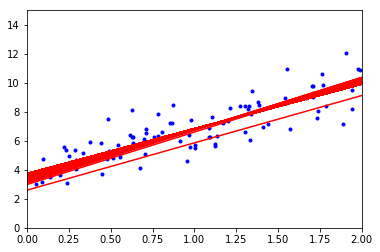

In [11]:
# BATCH GRADIENT DESCENT 
eta = 0.2 # learning rate 0.02, 0.1, 0.2, 0.5
n_iterations = 1000 
m = 100
theta = np.random.randn(2,1) # random initializtion 

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

X_new = np.array([[0], [2], [4]])
X_new_b = np.c_[np.ones((3,1)), X_new]


for iteration in range(n_iterations): #epoch
    grads = 2/m*X_b.T.dot(X_b.dot(theta) - y )
    theta = theta - eta*grads
    y_predict_2 = X_new_b.dot(theta) 
    plt.plot(X_new, y_predict_2, "r-")

print("SUCCESS")
print(theta)
plt.show()


In [12]:
# Stochastic Gradient Descent 
# Take one Training example at a time
n_epochs = 50 
t0, t1 = 5, 50  #learning schedule hyperparameters 

def learning_schedule(t):
    return t0 / (t  + t1)

theta = np.random.randn(2,1) # random initalization 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grads = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*grads 


theta



array([[3.73900252],
       [3.13355029]])

In [13]:
# Stochastic Gradient Descent using Sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\Users\basuru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.7668145]), array([3.15135825]))

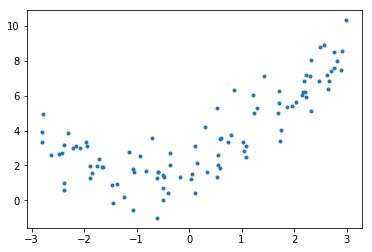

In [132]:
# Polynomial regression 
import random
random.seed( 30 )
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, ".")
plt.show()

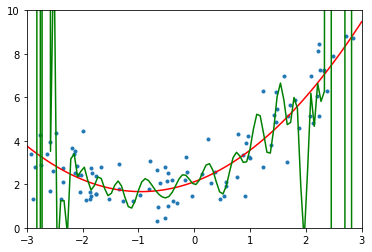

In [180]:
# If degree is 3 , all the possible conbination of features will be considered 
# a,b,c, --> a^3,b^3, c^3, ab, ab^2, ...  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
# degree 2
poly_features =  PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X)
x_poly = poly_features.transform(X)
std_scalar = StandardScaler()
std_scalar.fit(x_poly)
x_poly = std_scalar.transform(x_poly)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

X_new_poly = poly_features.transform(X_new)
X_new_poly = std_scalar.transform(X_new_poly)
y_pred = lin_reg.predict(X_new_poly)

# degree 300
poly_features_300 =  PolynomialFeatures(degree=300, include_bias=False)
poly_features_300.fit(X)
x_poly_300 = poly_features_300.transform(X)

std_scalar = StandardScaler()
std_scalar.fit(x_poly_300)
x_poly_300 = std_scalar.transform(x_poly_300)

lin_reg_300 = LinearRegression()
lin_reg_300.fit(x_poly_300, y)

X_new_poly = poly_features_300.transform(X_new)
X_new_poly = std_scalar.transform(X_new_poly)
y_pred_300 = lin_reg_300.predict(X_new_poly)

plt.axis([-3, 3, 0, 10])
plt.plot(X, y, ".")
plt.plot(X_new, y_pred, "-r")
plt.plot(X_new, y_pred_300, "-g")

plt.show()

In [181]:
# How to identify overfit , underfit in regression models 
# plot RMSE over training set size - 

In [182]:
"""
Regularized Linear Models 
1. Ridge Regression
    - Forces learning algorithm to fit the data, but also keep the model weights
    small as possible 
    - Regularization only adds with training 
    - cost function can be different in training and validation 
    - Sensitive to scale of the feature ( StandardScaler)
""" 



'\nRegularized Linear Models \n1. Ridge Regression\n    - Forces learning algorithm to fit the data, but also keep the model weights\n    small as possible \n    - Regularization only adds with training \n    - cost function can be different in training and validation \n    - Sensitive to scale of the feature ( StandardScaler)\n'

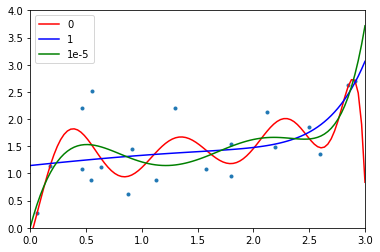

In [194]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

poly_features =  PolynomialFeatures(degree=10, include_bias=False)
x_poly = poly_features.fit_transform(X)
scl = StandardScaler()
scl.fit(x_poly)
x_poly = scl.transform(x_poly)
X_new_poly = poly_features.transform(X_new)
X_new_poly = scl.transform(X_new_poly)

#lin_reg = LinearRegression()
#lin_reg.fit(x_poly, y)

ridge_reg = Ridge(alpha=0, solver="cholesky")
ridge_reg.fit(x_poly, y)
y_pred = ridge_reg.predict(X_new_poly)
plt.plot(X, y, ".")
plt.plot(X_new, y_pred, "-r", label='0')

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x_poly, y)
y_pred = ridge_reg.predict(X_new_poly)
plt.plot(X_new, y_pred, "-b", label='1')

ridge_reg = Ridge(alpha=10**-5, solver="cholesky")
ridge_reg.fit(x_poly, y)
y_pred = ridge_reg.predict(X_new_poly)
plt.plot(X_new, y_pred, "-g", label='1e-5')

plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 3, 0, 4])
plt.show()

C:\Users\basuru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\basuru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\basuru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\basuru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small al

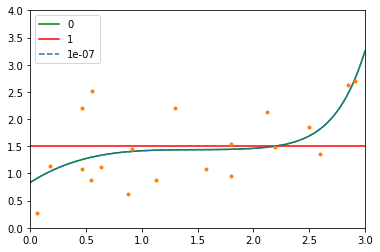

In [208]:
"""
* lasso regression 
* l1 regularization 
*eliminate weights of least important features 

"""
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

poly_features =  PolynomialFeatures(degree=10, include_bias=False)
x_poly = poly_features.fit_transform(X)
scl = StandardScaler()
scl.fit(x_poly)
x_poly = scl.transform(x_poly)
X_new_poly = poly_features.transform(X_new)
X_new_poly = scl.transform(X_new_poly)


lasso = Lasso(alpha=0, tol=0.00001)
lasso.fit(x_poly, y)
y_pred = lasso.predict(X_new_poly)
plt.plot(X_new, y_pred, "-g", label='0')

lasso = Lasso(alpha=1, tol=0.00001)
lasso.fit(x_poly, y)
y_pred = lasso.predict(X_new_poly)
plt.plot(X_new, y_pred, "-r", label='1')

lasso = Lasso(alpha=10**-7, tol=0.00001)
lasso.fit(x_poly, y)
y_pred = lasso.predict(X_new_poly)
plt.plot(X_new, y_pred, "--", label='1e-07')

plt.legend(loc='upper left', fontsize=10)
plt.plot(X, y, '.')
plt.axis([0, 3, 0, 4])
plt.show()





In [209]:
# ElasticNet - combination of rigid and lasso 
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])



array([1.54333232])

(25, 1)
(25, 1)


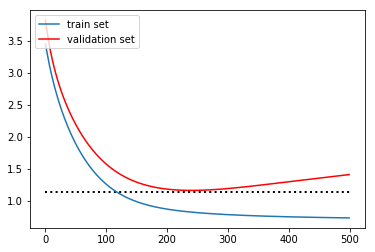

In [237]:
# Early stopping - Another regularization technique  
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
print(X_train.shape)
print(X_val.shape)

poly_scalar = Pipeline([
                        ("polynomial_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("standard_scalar", StandardScaler())
                        ])

#poly_scalar.fit(X_train, y)
X_train_poly_scaled = poly_scalar.fit_transform(X_train, y)
X_val_poly_scaled = poly_scalar.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, eta0=0.0005, 
                       tol=-np.infty, random_state=42, 
                       warm_start=True, penalty=None, learning_rate='constant')  # batch gradient decent 

n_epochs=500
train_errors, val_errors = [], []

for epoch in range(0, n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_pred = sgd_reg.predict(X_train_poly_scaled)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    
    train_error = mean_squared_error( y_train, y_train_pred)
    val_error = mean_squared_error( y_val, y_val_pred)
    
    train_errors.append(train_error)
    val_errors.append(val_error)
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
#print(train_errors.shape)
plt.plot( np.sqrt(train_errors), '-', label='train set')
plt.plot(np.sqrt(val_errors), '-r', label='validation set')
plt.legend(loc='upper left')
plt.show()






(25, 1)
(25, 1)


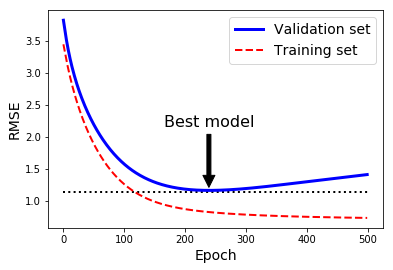

In [235]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

print(X_train.shape)
print(X_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

In [238]:
"""
Chapter 01 - End to End machine learning project 
%config IPCompleter.greedy=True
* frame problems
* define performance measure
    - ex: RMSE 
* Load data 
    - import pandas as pd (read_csv)
    - import os
* Analyze the distribution of features 
    - import matplotlib.pyplot as plt 
    - import pandas as pd (head, describe, value_counts, hist  )
* train, test selection 
    - import numpy as np 
    - from sklearn.model_selection import train_test_split
    - from sklearn.model_selection import StratifiedShuffleSplit
* EDA - correlation, scatter plots, find preprocessed or croped values of features, anomalies in distribution 
    - import pandas as pd (corr, plot)
    - from pandas.tools.plotting import scatter_matrix
    - import matplotlib.pyplot as plt (get_cmap)
* experiment different feature combinations 
* handeling missing values
    - from sklearn.preprocessing import Imputer
* handel categorical variables - label encoding, onehot encoding
    - from sklearn.preprocessing import LabelEncoder #lab
    - from sklearn.preprocessing import OneHotEncoder # return scipy sparse matrix
    - from sklearn.preprocessing import LabelBinarizer
* Writing custom feature transformation using sklearn
    - from sklearn.base import BaseEstimator, TransformerMixin
* Feature scaling - normalization(min - max)- not good with outliers , standardization(zero mean, unit variance )
    - from sklearn.preprocessing import StandardScaler 
* transformation piplines 
    - from sklearn.pipeline import Pipeline
    - from sklearn.pipeline import FeatureUnion

------ RELATED TO CHAPTER 2 ---
*training and evaluating the training set
    - from sklearn.linear_model import LinearRegression
* Find the error of training - ex: RMSE --> underfit --> complex model, more features, reduce constraints
    - from sklearn.metrics import mean_squared_error
* Better evaluation using cross validation
    - from sklearn.model_selection import cross_val_score
* Run validation on multiple models and select good models
    - from sklearn.tree import DecisionTreeRegressor
    - from sklearn.ensemble import RandomForestRegressor
* save trained models 
    - from skleran.externels import joblib
* Fine tune selected models - Grid Search , Randomized Search 
    - from sklearn.model_selection import GridSearchCV
    - from sklearn.model_selection import RandomizedSearchCV
    - from scipy.stats import randint as sp_randint
* Evaluate the system on test set
-----

* Launch, monitor and maintain the system
"""


"""
Chapter 02 - Classification 
* train-test split and random shuffeling of traning set (this is actually train and dev set)
* EDA 
* training and evaluating training set 
    - from sklearn.linear_model import SGDClassifier
* Find a proper evaluation metric to maximize/minimize during training 
* Compare multiple models 
    - Bias, variance compared to human level performance 
    - Select best few models 
    - To avoid bias - (better optimization[GD, SGB, mini batch GD, moment, adam, RMSprop], hyperparameter search[grid serach, ranamize search])
    - to avoid variance - (More data, regularization, hyperparameter search)
    - analyze PR curve, ROC curve to find better combination of precision and recall
    
* Select best 2-3 classfiers and run on test set 
    - Error Analysis 
    - If preformance is good in test set --> deploy the model 
    - If performance is not good --
         - Change the evaluation metric 
         - change dev, test sets 
* Multi class prediction 
    - OvA or OvO methods can be used
    - decision tree, random forest, naive bayes defualt support multi class classification
"""

"""
Summary - chapter 04 - Training Models 

** Linear/Polynomial Regression 
* We Need Gradient descent when there is no closed form solution (normal equation) or total data set is not fit to the memory 
* Tweak parameters iteratively to minimize a cost function
* cost funciton should be a convex function (MSE)
* Random initialization 
* Learning rate 
    - too small - take long time to converge 
    - too high  - jump across the valley and end up on the other side
* cost functions with holes, ridges, plateaus or irregular terrains
    - reach global minimum and local minimum 
    - very long time to cross plateau 
* Features should be in same scale (use StandardScalar)

* GD - batch , Stochastic, mini-batch 

*Learning curves 
    - How to determine how complex my model should be, overfitting/underfitting (regressions)
    - Plot - RMSE over train/test sizes
    
* Regularized Linear Models 
1. Ridge Regression
    - Forces learning algorithm to fit the data, but also keep the model weights
    small as possible 
    - Regularization only adds with training 
    - cost function can be different in training and validation 
    - Sensitive to scale of the feature ( StandardScaler)

2. Lasso regression 
    -l1 regularization 
    -eliminate weights of least important features 
3. Elastic nect 
4. Early stopping 
    - compare train/val errors 
    
** Logistic Regression 
* classifcation algorithm 
* cost function is log loss 


"""

'\nSummary - chapter 04 - Training Models \n\n** Linear/Polynomial Regression \n* We Need Gradient descent when there is no closed form solution (normal equation) or total data set is not fit to the memory \n* Tweak parameters iteratively to minimize a cost function\n* cost funciton should be a convex function (MSE)\n* Random initialization \n* Learning rate \n    - too small - take long time to converge \n    - too high  - jump across the valley and end up on the other side\n* cost functions with holes, ridges, plateaus or irregular terrains\n    - reach global minimum and local minimum \n    - very long time to cross plateau \n* Features should be in same scale (use StandardScalar)\n\n* GD - batch , Stochastic, mini-batch \n\n*Learning curves \n    - How to determine how complex my model should be, overfitting/underfitting (regressions)\n    - Plot - RMSE over train/test sizes\n    \n* Regularized Linear Models \n1. Ridge Regression\n    - Forces learning algorithm to fit the data, b

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(list(iris.keys()))
print(iris['feature_names'])
X = iris['data'][:, 3:] #petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0,3, 1000).reshape(-1, 1) # Since we have only one feature 
y_prob = log_reg.predict_proba(X_new)

#print(y_prob)

plt.plot(X_new, y_prob[:,1], "g-", label="iris")
plt.plot(X_new, y_prob[:,0], "b--", label="non-iris")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

X_boun = X_new[y_prob[:, 1] >= 0.5][0]
plt.plot([X_boun, X_boun], [-1, 1], "k:")
plt.axis([0,3,0,1.02])
print(X_boun)

plt.legend(loc="center right")
plt.show()




['data', 'target_names', 'target', 'filename', 'DESCR', 'feature_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[1.61561562]


<Figure size 640x480 with 1 Axes>

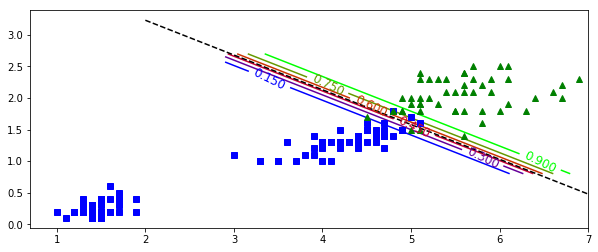

In [5]:
# decision boundary using two features 

X = iris['data'][:, 2:] #petal width
y = (iris["target"] == 2).astype(np.int)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

log_reg = LogisticRegression(solver="liblinear",  C=10**10, random_state=42)
log_reg.fit(X,y)
y_prob = log_reg.predict_proba(X_new)


plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_prob[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

left_right = np.array([2, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.plot(left_right, boundary, "k--")

plt.show()

#print(x0.shape)
#print(x0.ravel().shape)
#X_new = np.linspace(0,3, 1000).reshape(-1, 1) 
#print(X_new)

In [6]:
print(zz.shape)

(200, 500)


In [7]:

x0, x1 = np.meshgrid(
        np.linspace(2, 7, 5).reshape(-1, 1),
        np.linspace(0, 2, 3).reshape(-1, 1),
    )

In [8]:
x0

array([[2.  , 3.25, 4.5 , 5.75, 7.  ],
       [2.  , 3.25, 4.5 , 5.75, 7.  ],
       [2.  , 3.25, 4.5 , 5.75, 7.  ]])

In [9]:
x1

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.]])

In [10]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [11]:
X_new

array([[2.  , 0.  ],
       [3.25, 0.  ],
       [4.5 , 0.  ],
       [5.75, 0.  ],
       [7.  , 0.  ],
       [2.  , 1.  ],
       [3.25, 1.  ],
       [4.5 , 1.  ],
       [5.75, 1.  ],
       [7.  , 1.  ],
       [2.  , 2.  ],
       [3.25, 2.  ],
       [4.5 , 2.  ],
       [5.75, 2.  ],
       [7.  , 2.  ]])

In [ ]:
# Softmax regression for multiclass modeling 
# C - inverse regularization parameter - higher the C , regularization is less 
# lbfgs - hanlde multinomial loss 

X = iris['data'][:2]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

